<a href="https://colab.research.google.com/github/gayatri0502/Play_Store_Capstone_Project_By_Gayatri_Gupta/blob/main/Play_Store_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success.
Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more.
Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.

# **Imporating Required Packages**
  

In [2]:
# import pandas library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import plotly.express as px
import missingno as msno
from dateutil.parser import parse
%matplotlib inline

# **Mount Google Drive for Read Data**

In [3]:
# impoting google drve library
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# **Define User Defined Method for do specific task.**

In [4]:
def Convert_Size_Into_Bytes(size):
    size = str(size)
    size = size.replace(',', '')
    if 'M' in size:
      size = size.replace('M', '')
      size = pd.to_numeric(size) * 1000 * 1000
      return size
    elif 'K' in size:
      size = size.replace('K', '')
      size = pd.to_numeric(size) * 1000
      return size
    elif ',' in size:
      size = size.replace(',', '')
      return pd.to_numeric(size)
    elif '+' in size:
      size = size.replace('+', '')
      return pd.to_numeric(size)
    else:
      return 0


def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

def is_date_true_return_date(date):
  if(is_date(date)):
    return date
  else:
    return np.NaN

# **Description of Dataset**
**Let's take a look at the data, which consists of two files:**

playstore.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
We are going to use a simple csv file "Playstore.csv",Before getting into data, let's have a look at our dataset :-

* **App** :- Name of the App
* **Category** :- Category under which the App falls.
* **Rating** :- Application's rating on playstore
* **Reviews** :- Number of reviews of the App.
* **Size** :- Size of the App.
* **Install** :- Number of Installs of the App
* **Type** :- Whether the App is free/paid
* **Price** :- Price of the app (0 if it is Free)
* **Content Rating** :- Appropriate Target Audience of the App.
* **Genres**:- Genre under which the App falls.
* **Last Updated** :- Date when the App was last updated
* **Current Ver** :- Current Version of the Application
* **Android Ver** :- Minimum Android Version required to run the App

# **Read Data From CSV file and store into dataset**

In [5]:
# reading data from csv store into data set
df_ps = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Play_Store_Data.csv')
df_ur =pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/User_Reviews.csv')

# **Filter and Clean the data** 
Data cleaning is one of the most essential subtask of any data science project. Although it can be a very tedious process, it's worth should never be undermined.



In [6]:
category =  df_ps['Category'].str.replace('.','', regex=False);
category_drop_index = df_ps.index[category.str.isnumeric()  == True]
df_ps = df_ps.drop(category_drop_index)


Find null record in rating and replace with mode value of columns. So because we not losses important data.

In [7]:
rating_mode_value = df_ps['Rating'].mode()
df_ps['Rating'].fillna(value = rating_mode_value[0], inplace = True)

Find null value and replace with 0.


In [8]:
df_ps['Reviews'].fillna(value = '0', inplace = True)
df_ps['Reviews'] = pd.to_numeric(df_ps['Reviews'])

Define Convert_Size_Into_Bytes and convert from MB, KB into byte so we can compare 

In [9]:
# Using List Comp. to cleaning data
df_ps['Size'] = [Convert_Size_Into_Bytes(col) for col in df_ps['Size']]

remove extra char from Installs column 


*   replacing '+' and ','
*   'Free' word and remove. 



In [10]:
# Using List Comp. to cleaning data
df_ps['Installs'] = [col.replace('+', '').replace(',', '').replace('Free', '0') for col in df_ps['Installs']]
df_ps['Installs'] = pd.to_numeric(df_ps['Installs'])

Replacing Null value with Free because we don't want loss data.


In [11]:
df_ps['Type'].fillna('Free',inplace=True)
df_ps['Type'] = df_ps['Type'].replace('0', 'Free')

Replacing $ sign with '' because want data in interger format so we can plot and compare prices.

In [12]:
# Price correct
df_ps['Price'] = df_ps['Price'].str.replace('$', '', regex= False)
df_ps['Price'] = pd.to_numeric(df_ps['Price'])

Formating Date and check row value is date or not because some case date is in alpha numeric or numbers. 

In [13]:
# formating the date
df_ps['Last Updated'] = [is_date_true_return_date(x)  for x in df_ps['Last Updated']]
df_ps['Last Updated'] = pd.to_datetime(df_ps['Last Updated'])

In [23]:
andriod_ver = df_ps['Android Ver'].unique()
df_ps['Android Ver'] = df_ps['Android Ver'].replace('4.4W and up', '4.4 and up')
print(andriod_ver)

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4 and Up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1'
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


Droping null values rows in datasets. 

In [16]:
# drop the null values
df_ps = df_ps.dropna()
df_ur = df_ur.dropna()

Droping duplicate row in dataset.

In [17]:
# removes duplicates
df_ps.drop_duplicates(inplace = True)
df_ur.drop_duplicates(inplace = True)

In [18]:
df_ps.drop_duplicates(subset='App',inplace=True)

In [19]:
df_ps.shape
df_ps.info()
df_ps.head()
df_ps.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000000.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


**Observation 1**
   

*  Below Plot giving information about number of app in each category. So observer can understand which category have most app.


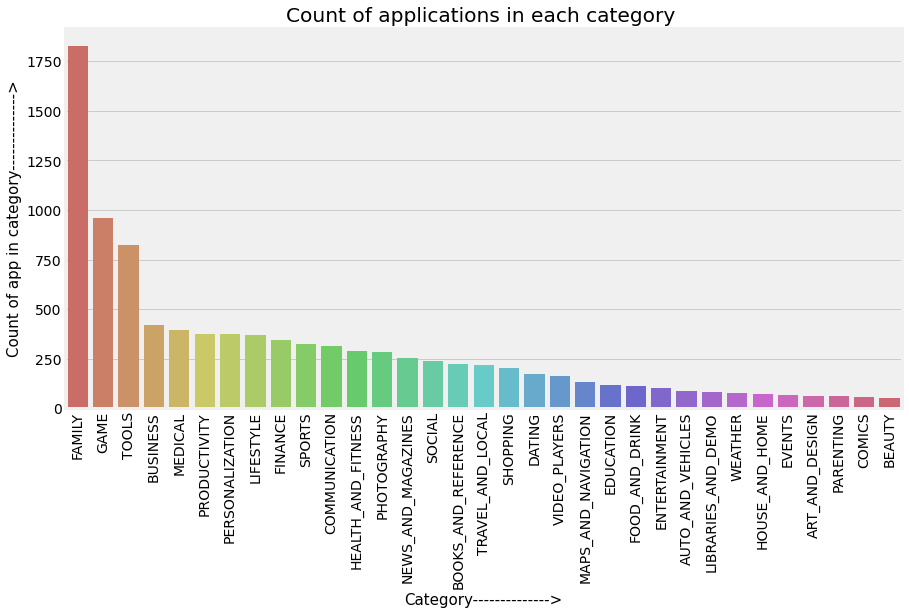

In [20]:
# ploting countplot for "Category" column
plot.figure(figsize=(15,7))
plot.style.use("fivethirtyeight")
sns.countplot(x= 'Category', data=df_ps, order=df_ps.Category.value_counts().index,palette="hls")
plot.xlabel("Category-------------->", fontsize=15)
plot.ylabel("Count of app in category-------------->", fontsize=15)
plot.title("Count of applications in each category ")
plot.xticks(rotation=90)
plot.show();

**Observation 2**
   

*  Below Plot giving information about number Free and Paid. It is showing information paid and free app are on play store.






<Figure size 1080x720 with 0 Axes>

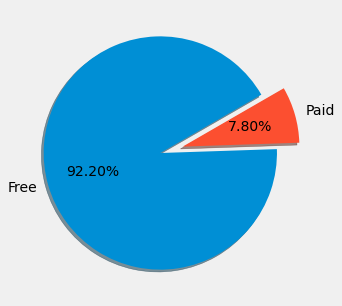

In [21]:
plot.figure(figsize=(15,10))
x=df_ps.Type.value_counts()
label=["Free","Paid"]
plot.figure(figsize=(16,5))
plot.pie(x,labels=label,autopct="%1.2f%%",shadow=True, explode=[0, 0.2], startangle=30)
plot.show()

**Observation 3**
   

*  Below Plot giving information about number of app in which andriod version.






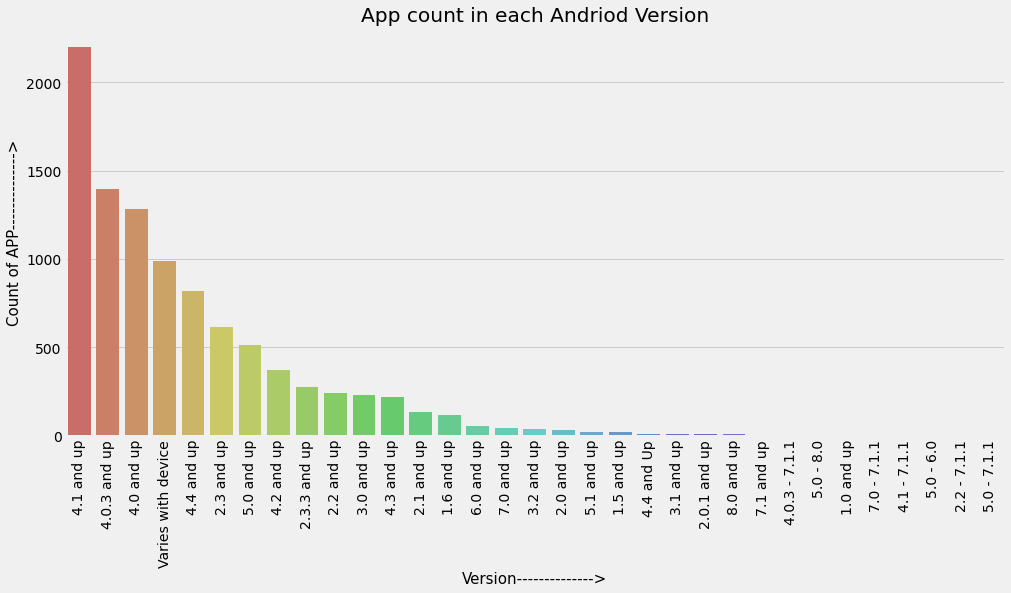

In [24]:
count_AndroidVer=pd.value_counts(df_ps["Android Ver"], sort=True)
df_andriod_version = pd.DataFrame(count_AndroidVer)

plot.figure(figsize=(15,7))
plot.style.use("fivethirtyeight")
sns.countplot(x= 'Android Ver', data=df_ps, order=df_ps['Android Ver'].value_counts().index,palette="hls")
plot.xlabel("Version-------------->", fontsize=15)
plot.ylabel("Count of APP-------------->", fontsize=15)
plot.title("App count in each Andriod Version")
plot.xticks(rotation=90)
plot.show();

**Observation 4**
   

*  Below Plot giving information about number of app lie in between sizes.


                       index  Size
0              (-0.001, 1.0]  1541
1           (1.0, 1000000.0]     7
2    (1000000.0, 10000000.0]  3610
3  (10000000.0, 100000000.0]  4501


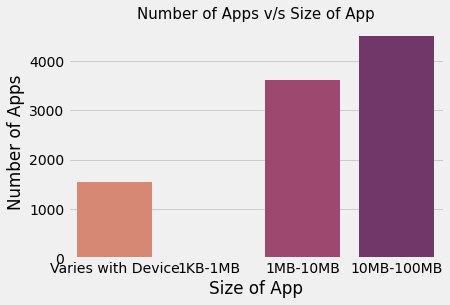

<Figure size 720x360 with 0 Axes>

In [155]:
bins = [0,1,1000000,10000000,100000000]
df_plot = df_ps['Size'].value_counts(bins=bins, sort=False).to_frame()
df_plot = df_plot.reset_index()

print(df_plot)
#plot for number of apps in different file size range
ax = sns.barplot(y="Size",x="index", data=df_plot, palette='flare')
positions = (0,1, 2, 3)
labels = ('Varies with Device','1KB-1MB','1MB-10MB','10MB-100MB')
plot.xticks(positions, labels)
plot.xlabel('Size of App')
plot.ylabel('Number of Apps')
plot.title('Number of Apps v/s Size of App',size = 15 )
plot.figure(figsize = (10,5))
plot.show()

**Observation 1**
   

*  Below Plot giving information about number of app based on content rating So it give information about most of app in which type of contents have. 






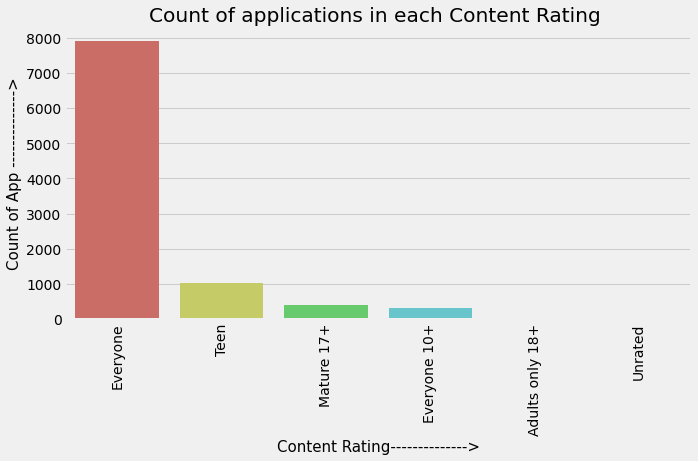

In [156]:
plot.figure(figsize=(10,5))
plot.style.use("fivethirtyeight")
sns.countplot(x= 'Content Rating', data=df_ps, order=df_ps['Content Rating'].value_counts().index,palette="hls")
plot.xlabel("Content Rating-------------->", fontsize=15)
plot.ylabel("Count of App -------------->", fontsize=15)
plot.title("Count of applications in each Content Rating ")
plot.xticks(rotation=90)
plot.show();

**Observation 6**
   

*  Below Plot giving information about number of app in category and also giving information about free and paid. 






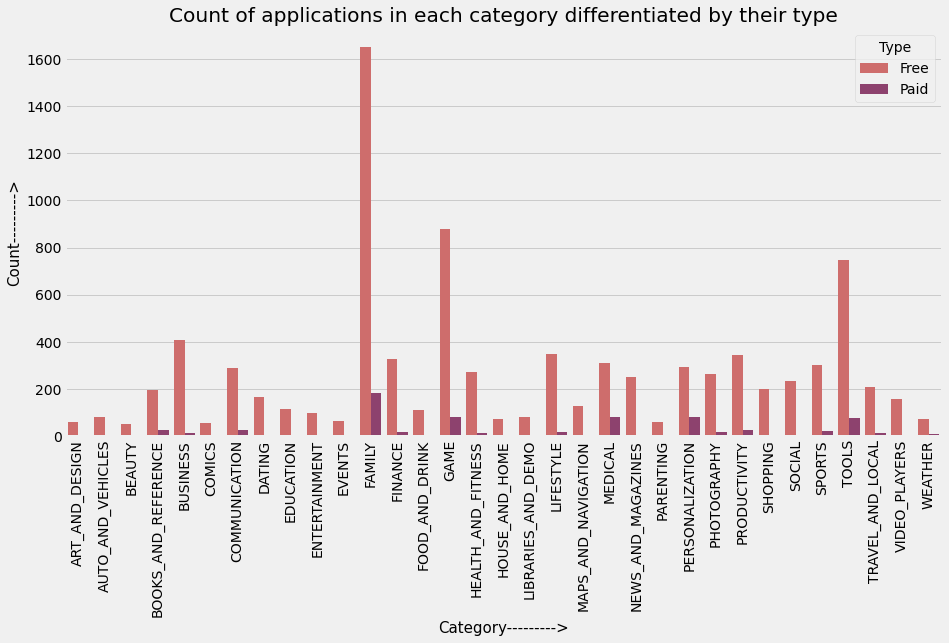

In [157]:
scene_3 = df_ps.groupby(["Category","Type"])["App"].count().reset_index()
point_3=pd.DataFrame(scene_3)
# we are plotting bar plot for above grouped dataframe
plot.figure(figsize=(14,7))
plot.style.use("fivethirtyeight")
sns.barplot(x="Category",y="App",hue="Type",data=point_3,palette="flare")
plot.xlabel("Category--------->", fontsize=15)
plot.ylabel("Count--------->", fontsize=15)
plot.title("Count of applications in each category differentiated by their type")
plot.xticks(rotation=90)
plot.show();

**Observation 7**
   

*  From the above plot we can infer that communication and social apps are most reviewed by the mass of public compared to others


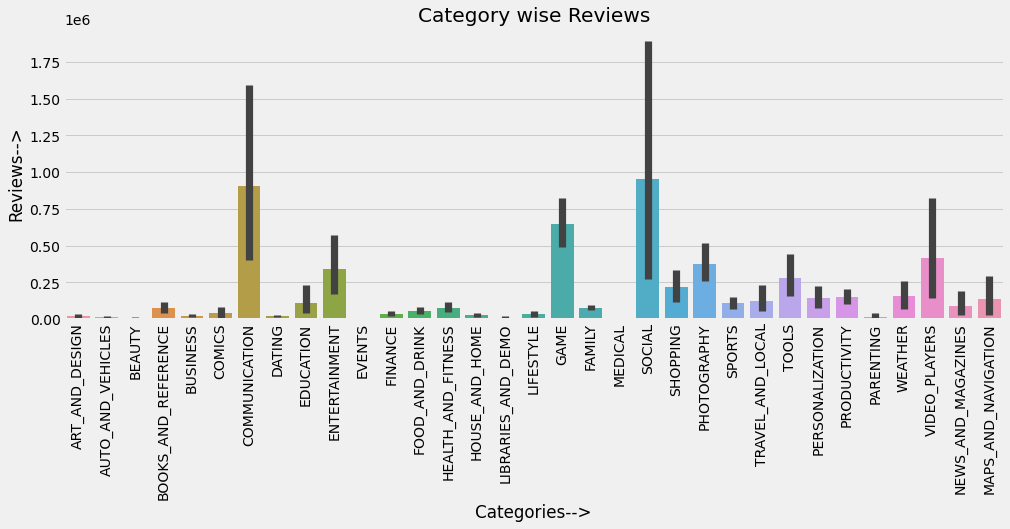

In [158]:
plot.figure(figsize=(15,5))
sns.barplot(x=df_ps['Category'],y=df_ps['Reviews'])
plot.xticks(rotation=90)
plot.title('Category wise Reviews')
plot.xlabel('Categories-->')
plot.ylabel('Reviews-->')
plot.show()

**Observation 8**
   

*  Below Plot giving information about number of app Last updated. 






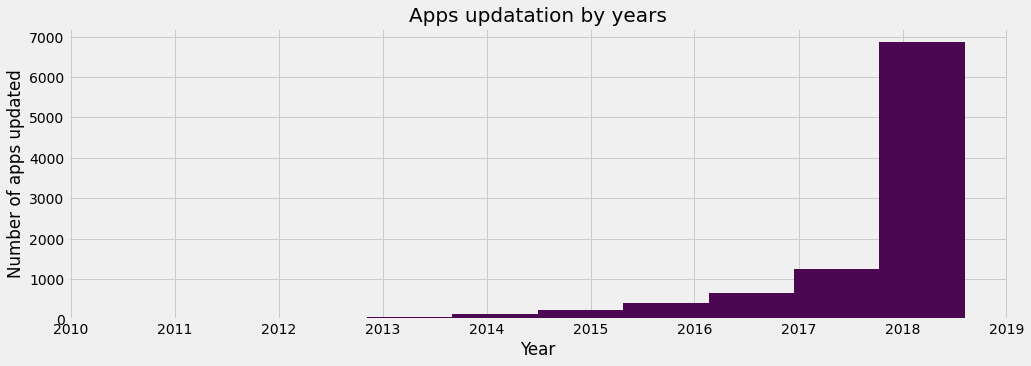

In [160]:
#App Updatation Details By Year
plot.figure(figsize=(15,5))
plot.title("Apps updatation by years", fontsize=20)
ax = plot.hist(df_ps['Last Updated'], color="#4B0751")
plot.tick_params(left='on', bottom='on') 
plot.xlabel("Year")
plot.ylabel("Number of apps updated");
plot.show() 

**Observation 9**
   

*  From our research, we found that the average volume of ratings across all app categories is between 4-4.5.
*  The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.






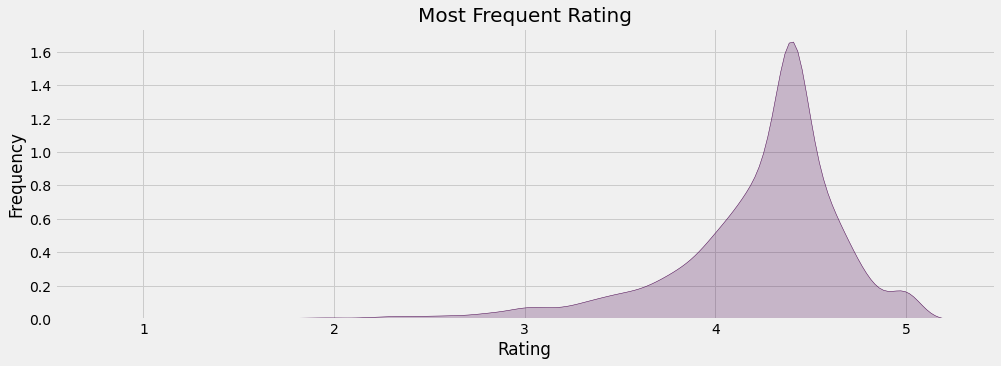

In [161]:
# Most Frequent Rating on playstore Apps
plot.figure(figsize=(15,5))
plot.xlabel("Rating")
plot.ylabel("Frequency")
graph = sns.kdeplot(df_ps.Rating, color="#4B0751", shade = True)
plot.title('Most Frequent Rating',size = 20);

**Observation 10**
   
*  Geners wise top apps in playstore


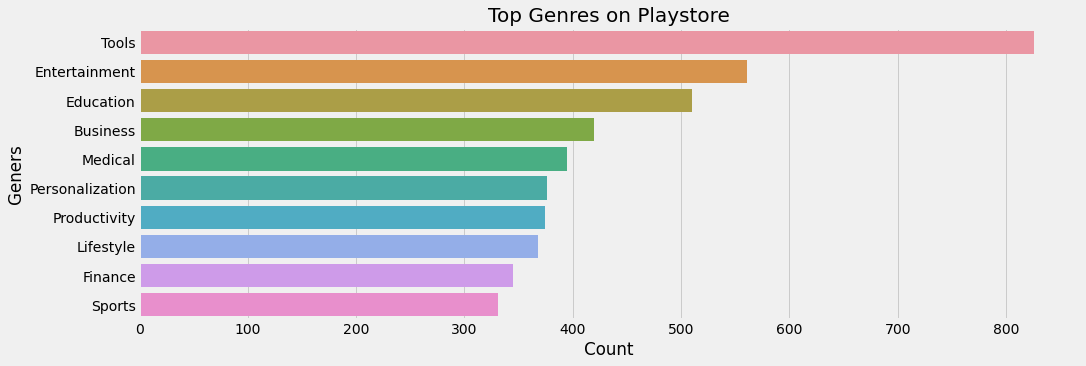

In [162]:
y = df_ps['Genres'].value_counts().index
x = df_ps['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plot.figure(figsize=(15,5))
plot.xlabel("Count")
plot.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

**Observation 11**


*   Before ending our story let me introduce the "Sentiment" of our story.
*   sentiments give us an idea about the emotions of the story whether it's positive,negative or neutral




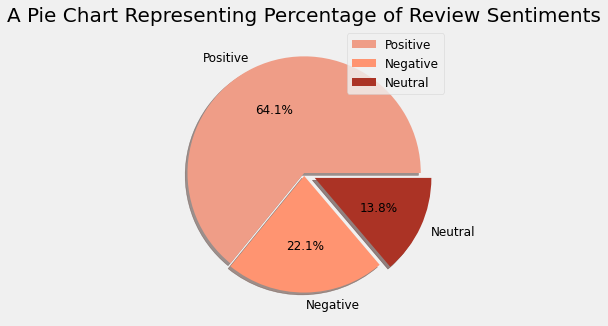

In [166]:
#Piechart
plot.figure(figsize=(8,5))
plot.style.use("fivethirtyeight")
slices=df_ur.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
colors = ['#EF9D87','#FF9471','#AB3325']
plot.rcParams['font.size'] = 12
plot.rcParams['figure.figsize'] = (8, 8)
plot.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plot.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plot.legend()
plot.show();